# **<h1><center><span style="color:#3775a8"><u>Projet Analyse de sentiments </u></span></center></h1>**

### Intallation des packages

In [ ]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, precision_score

from wordcloud import WordCloud

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
# Loading the data.
train  =  pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test  =  pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
test_y  =  pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip')


In [3]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [4]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


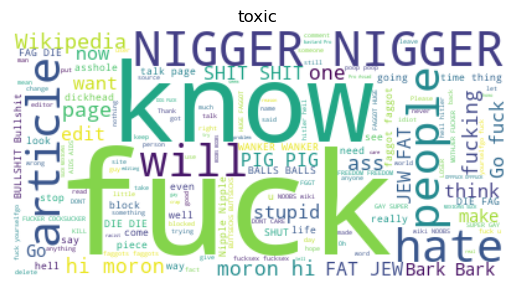

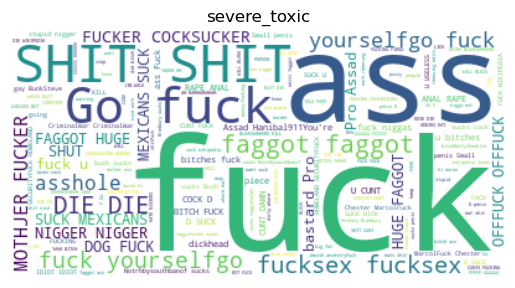

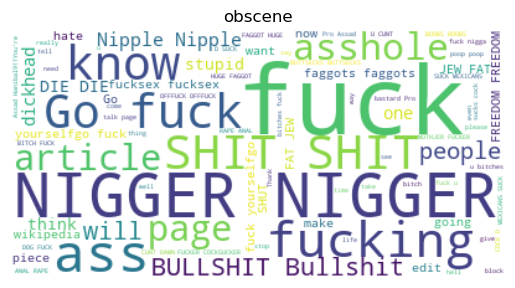

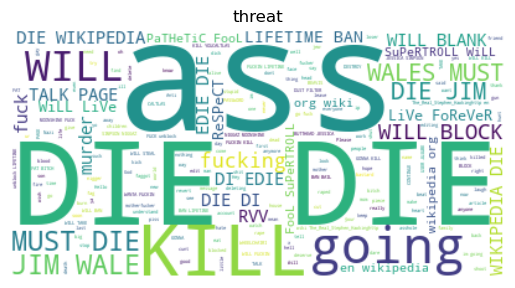

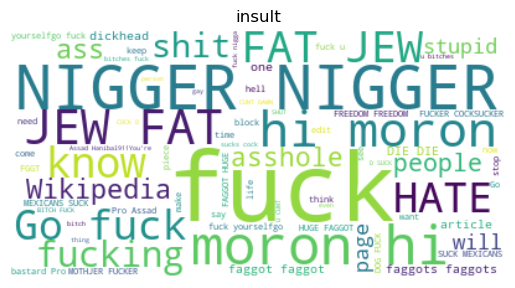

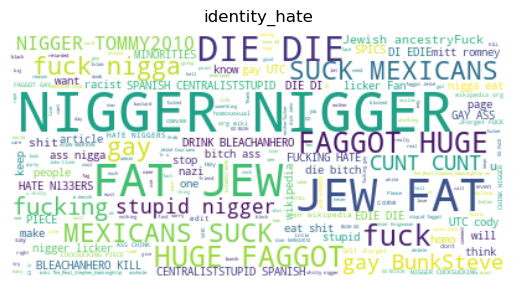

In [5]:
# Créer un dictionnaire de mots pour chaque catégorie
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for cat in categories:
    # Concaténer tous les commentaires pour la catégorie donnée
    text = " ".join(train.loc[train[cat] == 1]['comment_text'])

    # Créer le nuage de mots
    wordcloud = WordCloud(background_color="white").generate(text)

    # Afficher le nuage de mots
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(cat)
    plt.show()

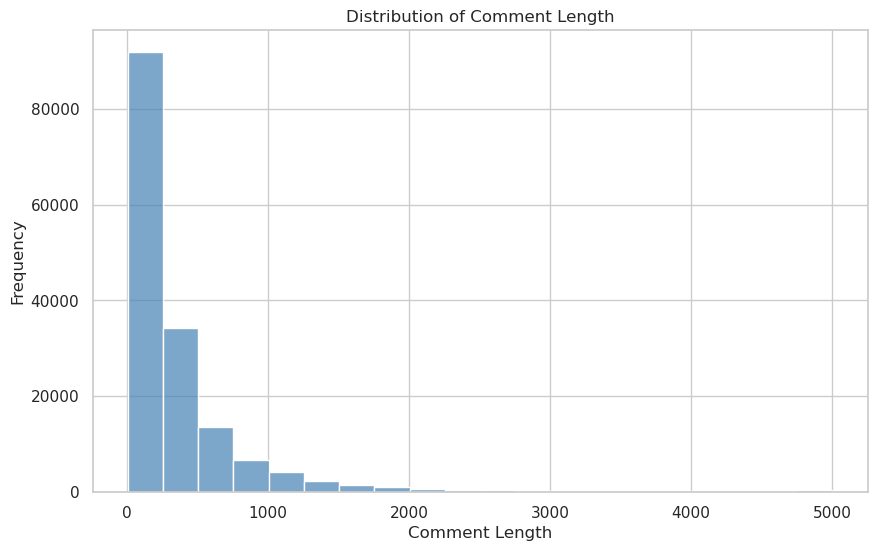

In [6]:
sns.set(style='whitegrid')

# Load the data
comment_len = train.comment_text.str.len()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(comment_len, bins=20, color='steelblue', alpha=0.7, ax=ax)

# Add labels and title
ax.set_xlabel('Comment Length')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Comment Length')

# Show the plot
plt.show()

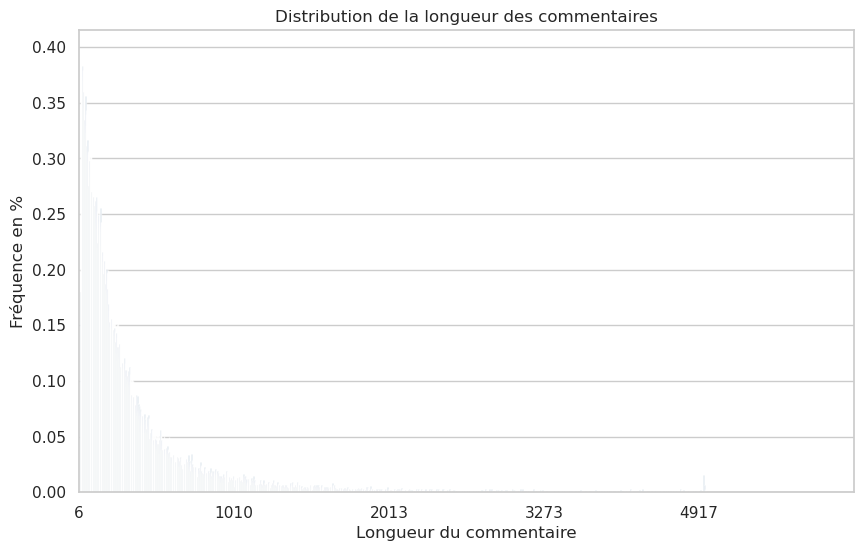

In [7]:
sns.set(style='whitegrid')

# Charger les données
comment_len = train.comment_text.str.len()

# Calculer la fréquence en pourcentage
freq_percentage = comment_len.value_counts(normalize=True) * 100

# Convertir les fréquences en pourcentage en un DataFrame
df_freq_percentage = pd.DataFrame({'Comment Length': freq_percentage.index, 'Frequency (%)': freq_percentage.values})

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_freq_percentage, x='Comment Length', y='Frequency (%)', color='steelblue', alpha=0.7)

# Ajouter les étiquettes et le titre
ax.set_xlabel('Longueur du commentaire')
ax.set_ylabel('Fréquence en %')
ax.set_title('Distribution de la longueur des commentaires')

# Définir les emplacements et les étiquettes des graduations sur l'axe x
step = 1000
plt.xticks(np.arange(0, max(comment_len) + step, step))

# Afficher le graphique
plt.show()


In [8]:
# Calculer le pourcentage de commentaires supérieurs à 1000 mots
percentage_above_1000 = (comment_len > 1000).mean() * 100

# Afficher le pourcentage
print(f"Pourcentage de commentaires supérieurs à 1000 mots : {percentage_above_1000:.2f}%")


Pourcentage de commentaires supérieurs à 1000 mots : 8.37%


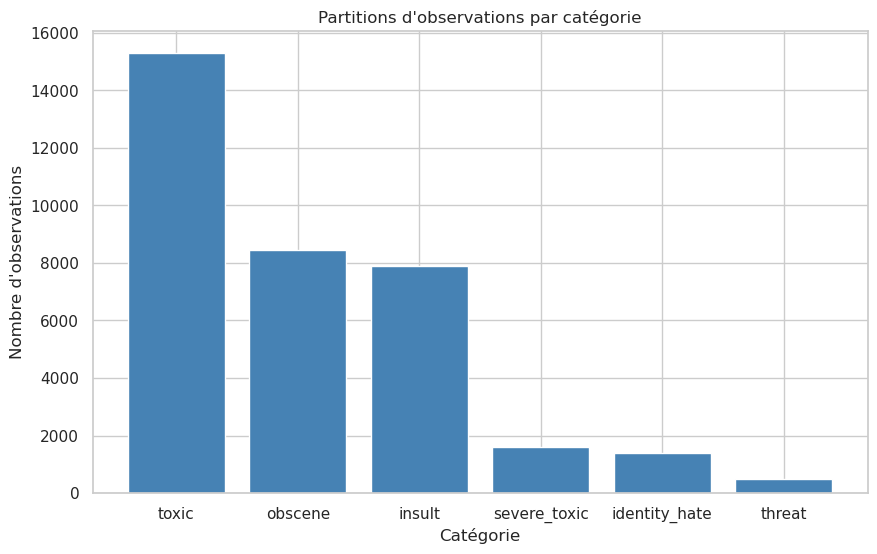

In [9]:
# Compter le nombre d'observations dans chaque catégorie
counts = train.iloc[:,2:].sum(axis=0).sort_values(ascending=False)

# Créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='steelblue')

# Ajouter des étiquettes d'axe et de titre
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'observations")
plt.title("Partitions d'observations par catégorie")

# Afficher le graphique
plt.show()


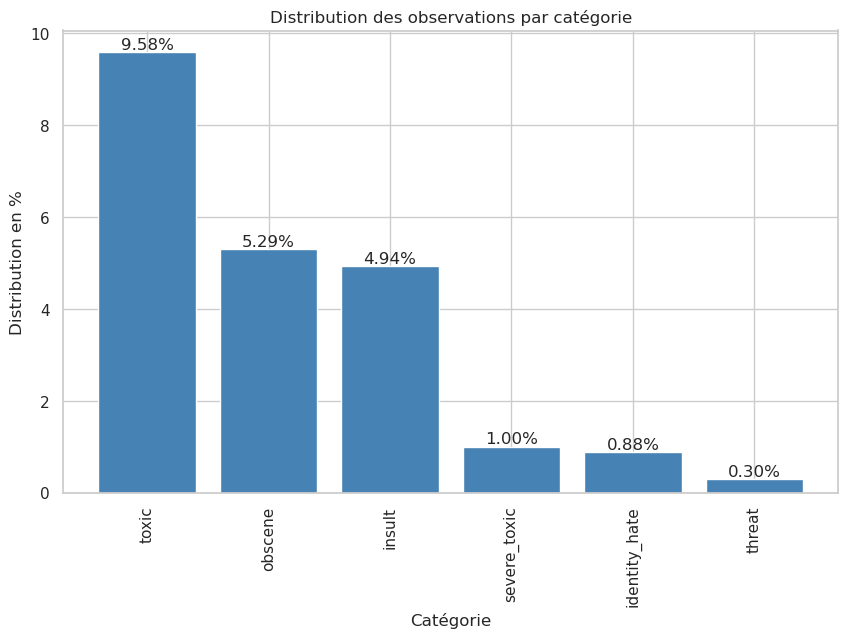

In [10]:
# Compter le nombre d'observations dans chaque catégorie
counts = train.iloc[:, 2:].sum(axis=0).sort_values(ascending=False)

# Calculer la distribution en pourcentage
percentage_distribution = (counts / len(train)) * 100

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_distribution.index, percentage_distribution.values, color='steelblue')

# Ajouter des étiquettes d'axe et de titre
plt.xlabel("Catégorie")
plt.ylabel("Distribution en %")
plt.title("Distribution des observations par catégorie")

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Ajouter les pourcentages sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Afficher le graphique
plt.show()


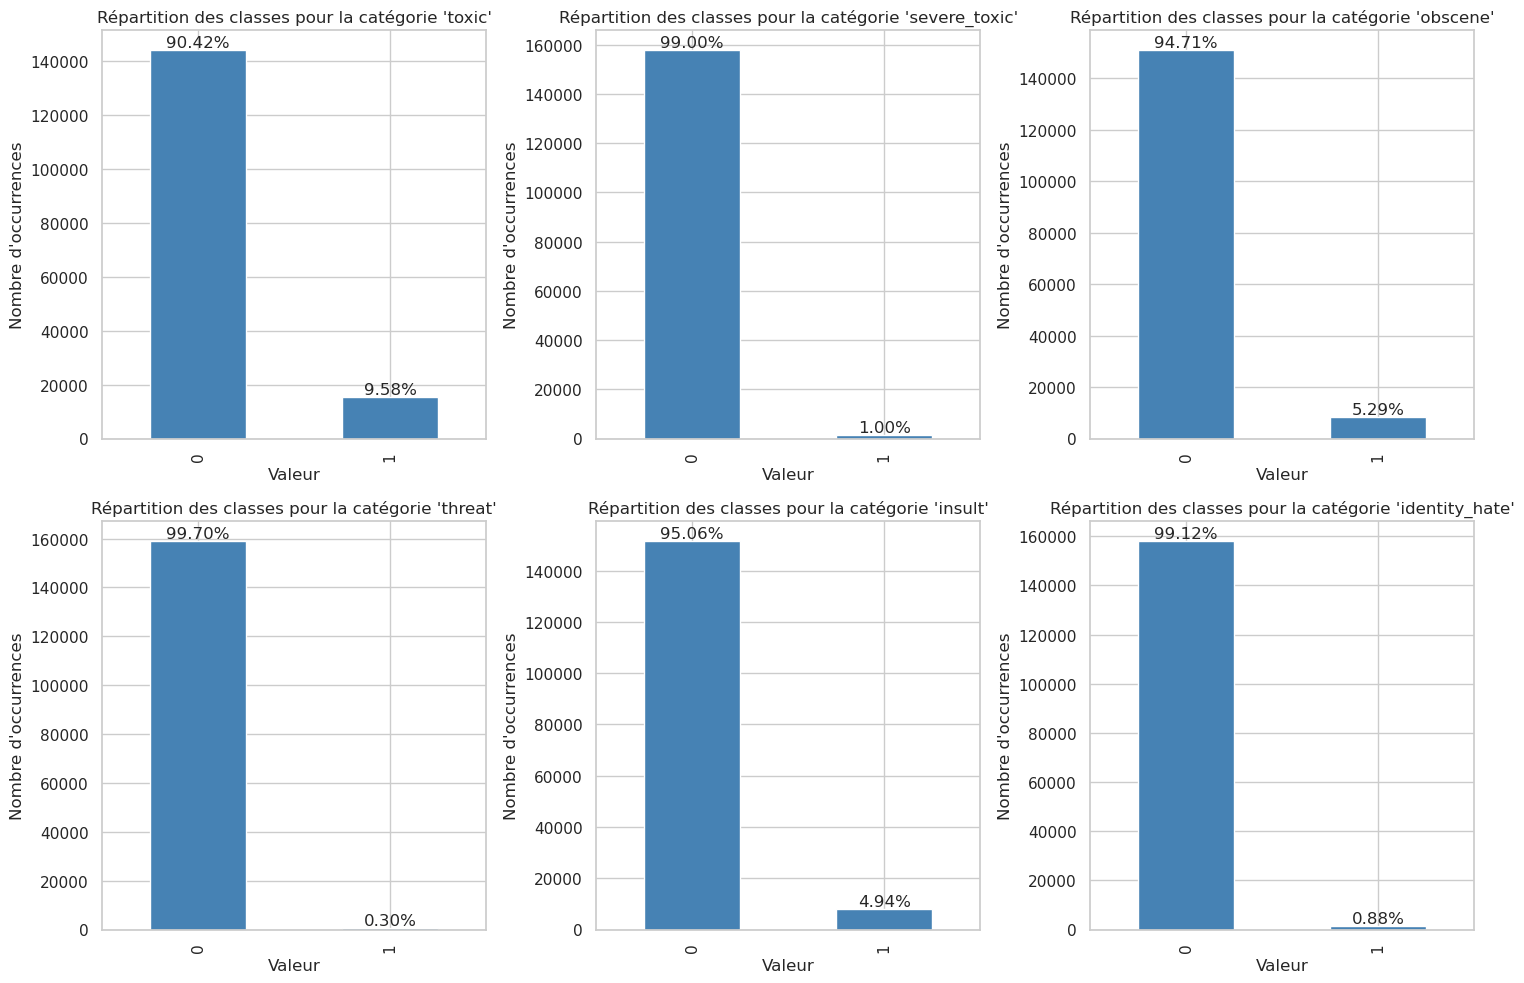

In [11]:
# Compter le nombre de 0 et de 1 pour chaque classe pour chaque catégorie
counts = pd.DataFrame()
for col in train.columns[2:]:
    counts[col] = train[col].value_counts()

# Créer un graphique en barres pour chaque catégorie
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(counts.columns):
    # Calculer la distribution en pourcentage
    percentage_distribution = (counts[col] / counts[col].sum()) * 100

    counts[col].plot(kind='bar', ax=axes[i], color='steelblue')
    axes[i].set_title(f"Répartition des classes pour la catégorie '{col}'")
    axes[i].set_xlabel("Valeur")
    axes[i].set_ylabel("Nombre d'occurrences")

    # Ajouter les pourcentages sur les barres
    for j, v in enumerate(counts[col]):
        percentage = percentage_distribution[j]
        axes[i].text(j, v, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


La matrice que vous avez partagée représente les corrélations entre différents types de commentaires toxiques. Chaque colonne et chaque ligne représentent une catégorie de commentaires toxiques, et chaque cellule représente le coefficient de corrélation entre les deux catégories correspondantes. Le coefficient de corrélation varie de -1 à 1, où 1 indique une corrélation positive parfaite, -1 une corrélation négative parfaite et 0 aucune corrélation.

Voici une analyse basée sur cette matrice :

1. **Toxicité et Obscénité** : Il y a une forte corrélation (0.676515) entre les commentaires toxiques et les commentaires obscènes, ce qui signifie que lorsqu'un commentaire est jugé toxique, il est souvent jugé obscène aussi.

2. **Toxicité et Insulte** : La corrélation entre les commentaires toxiques et les insultes est également forte (0.647518), indiquant que les commentaires qui sont jugés toxiques sont souvent jugés insultants.

3. **Obscénité et Insulte** : C'est la plus forte corrélation de toutes (0.741272), ce qui signifie que les commentaires qui sont jugés obscènes sont très souvent jugés insultants aussi.

4. **Menace et Autres Catégories** : Les commentaires menaçants ont une corrélation relativement faible avec les autres catégories (entre 0.115128 et 0.157058). Cela pourrait signifier que les commentaires menaçants sont généralement distincts des autres types de commentaires toxiques.

5. **Haine Identitaire et Autres Catégories** : Les commentaires de haine identitaire ont une corrélation modérée avec les autres catégories, avec la corrélation la plus forte avec les insultes (0.337736).

6. **Toxicité Sévère et Autres Catégories** : Les commentaires sévèrement toxiques ont une corrélation modérée avec les autres catégories, avec la corrélation la plus forte avec les commentaires obscènes (0.403014).

En conclusion, cette matrice montre que certains types de comportements toxiques sont souvent liés les uns aux autres. Cependant, certains comportements, comme les menaces, semblent être plus distincts. Ces observations peuvent être utiles pour la modélisation et la prédiction des commentaires toxiques.

La corrélation observée entre ces différentes classes de commentaires toxiques a des implications importantes pour la modélisation.

1. **Multi-label Classification** : La présence de corrélations positives significatives entre ces différentes catégories indique que nous avons affaire à un problème de classification multi-labels, où chaque commentaire peut appartenir à plusieurs catégories à la fois.

2. **Corrélations en Caractéristiques** : Les corrélations élevées entre certaines catégories indiquent que certaines caractéristiques peuvent être communes à plusieurs types de commentaires toxiques. Cela peut aider à l'identification des caractéristiques à utiliser dans la modélisation.

3. **Modèle Indépendant vs Modèle Commun** : Les corrélations peuvent aussi soulever la question de savoir s'il faut utiliser un modèle unique qui prédit toutes les classes de toxicité en même temps, ou des modèles indépendants pour chaque classe de toxicité. Un modèle unique pourrait tirer parti des corrélations pour améliorer ses prédictions.

4. **Rééquilibrage des Classes** : Étant donné le déséquilibre apparent des classes (certaines catégories de toxicité étant beaucoup plus fréquentes que d'autres), l'analyse de corrélation pourrait aider à déterminer la nécessité et la méthode de rééquilibrage des classes. Par exemple, un sur-échantillonnage des classes minoritaires ou un sous-échantillonnage des classes majoritaires.

5. **Complexité du Modèle** : Enfin, la présence de corrélations pourrait augmenter la complexité du modèle, puisqu'il doit tenir compte des interactions entre les différentes catégories. Cela pourrait avoir des implications pour le choix de l'algorithme d'apprentissage, l'ajustement des paramètres du modèle, et le temps de formation. 

Il est donc crucial d'incorporer cette analyse de corrélation dans l'étape de préparation des données et la conception du modèle.

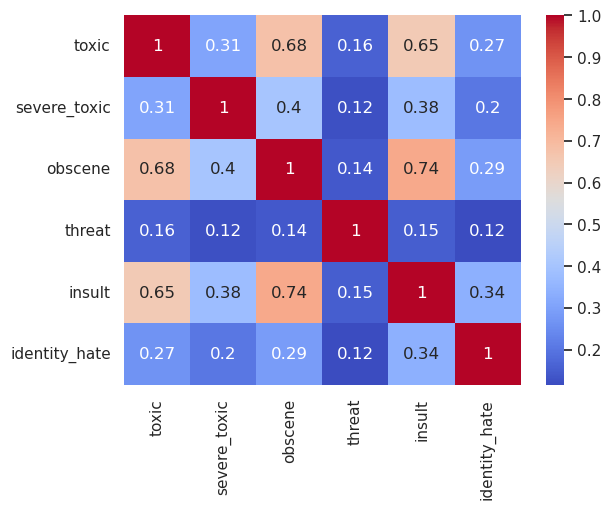

In [12]:
# Compute the correlation matrix
corr = train.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Preprocessing

Le code que vous avez partagé est destiné à l'extraction de certaines caractéristiques du texte des commentaires dans un jeu de données d'apprentissage. Ces caractéristiques peuvent ensuite être utilisées pour construire un modèle de machine learning qui classifie les commentaires selon leur niveau de toxicité. Voici une explication détaillée de chaque partie :

1. **Longueur moyenne des commentaires** : La première partie du code ajoute une nouvelle colonne au DataFrame `train` qui stocke la longueur de chaque commentaire (le nombre total de caractères). Ensuite, il calcule la longueur moyenne de tous les commentaires et stocke cette valeur dans une nouvelle colonne `avg_comment_length`.

2. **Nombre de points d'exclamation** : La deuxième partie du code ajoute une autre colonne qui compte le nombre de points d'exclamation utilisés dans chaque commentaire. Les points d'exclamation peuvent être un indicateur de l'intensité émotionnelle du commentaire, ce qui pourrait être lié à la toxicité.

3. **Nombre de mots en majuscules** : La troisième partie du code compte le nombre de mots entièrement en majuscules dans chaque commentaire. Les mots en majuscules sont souvent utilisés pour exprimer une forte émotion ou crier dans le langage de l'Internet, ce qui pourrait également être lié à la toxicité.

4. **Affichage du DataFrame** : Enfin, le code affiche le DataFrame `train` avec les nouvelles colonnes ajoutées.

Ces nouvelles caractéristiques pourraient aider à améliorer les performances d'un modèle de machine learning en fournissant des informations supplémentaires sur les commentaires. Par exemple, un commentaire contenant de nombreux points d'exclamation ou mots en majuscules pourrait être plus susceptible d'être toxique. Cependant, l'efficacité de ces caractéristiques dépendra de l'algorithme d'apprentissage utilisé et des données spécifiques.

In [13]:
# Calcul de la longueur moyenne des commentaires
train['comment_length'] = train['comment_text'].apply(lambda x: len(x))
train['avg_comment_length'] = train['comment_length'].mean()

# Calcul du nombre de points d'exclamation dans les commentaires
train['exclamation_count'] = train['comment_text'].str.count('!')

# Calcul du nombre de mots en majuscules dans les commentaires
train['uppercase_words_count'] = train['comment_text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Affichage du dataframe avec les nouvelles colonnes
train


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,avg_comment_length,exclamation_count,uppercase_words_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,394.073221,0,2
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,394.073221,1,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,394.073221,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,394.073221,0,5
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,394.073221,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,394.073221,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,394.073221,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,394.073221,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,394.073221,0,1


La fonction `preprocessing()` est utilisée pour nettoyer et normaliser le texte afin de le préparer pour une analyse plus approfondie. Elle convertit tout le texte en minuscules, élimine la ponctuation, les chiffres et les caractères spéciaux, puis sépare le texte en mots individuels. Ensuite, elle supprime tous les caractères non-ASCII et réduit les mots à leur forme de base à l'aide de la lemmatisation. Enfin, elle supprime tous les mots courts de deux lettres ou moins. Le résultat est une liste de mots nettoyés et normalisés prêts pour une analyse de texte plus approfondie.

In [14]:
def preprocessing(text):
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [15]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Ce code effectue une évaluation comparative (benchmarking) de trois différentes méthodes de vectorisation (représentation numérique du texte) : 'Frequency Vector' (comptage des fréquences des mots), 'One Hot Encoding' (chaque mot est représenté par un vecteur de 0 et 1 indiquant sa présence ou absence) et 'TF-IDF' (Term Frequency-Inverse Document Frequency, qui mesure l'importance relative d'un mot dans le document par rapport à l'ensemble du corpus). Le but est d'évaluer leur performance sur un modèle de classification LinearSVC pour plusieurs catégories de commentaires toxiques.

Pour chaque méthode de vectorisation, le code transforme le texte des commentaires en une matrice de vecteurs, puis utilise cette matrice pour entraîner et évaluer un modèle LinearSVC, en utilisant l'aire sous la courbe ROC (AUC) comme mesure de performance et une validation croisée stratifiée en 5 plis.

Le temps de calcul est également mesuré pour chaque combinaison de méthode de vectorisation et de catégorie de commentaires. Les résultats (méthode de vectorisation, catégorie de commentaires, AUC et temps de calcul) sont ensuite stockés dans un DataFrame pour une analyse ultérieure.

In [17]:
from sklearn.model_selection import cross_val_score
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

# Modèle de classification LinearSVC
classifier = LinearSVC()

# Liste pour stocker les résultats des benchmarks
results = []
vectorization_methods = ['Frequency Vector','One Hot Encoding','TF-IDF']
# Boucle pour tester chaque méthode de vectorisation
for method in vectorization_methods:
    start_time = time.time()
    
    # Vectorisation des données d'entraînement
    if method == 'Frequency Vector':
        vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=preprocessing, stop_words='english',
                         strip_accents='unicode', min_df=10)
    elif method == 'One Hot Encoding':
        vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=preprocessing, stop_words='english',
                         strip_accents='unicode', min_df=10,binary=True)
    elif method == 'TF-IDF':
        vectorizer = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=preprocessing, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
    else:
        continue  # Ignorer si la méthode n'est pas reconnue
        
    for label in categories:
    
        X = vectorizer.fit_transform(train['comment_text'])  # supposons que df est votre DataFrame qui contient toutes vos données
        y = train[label]
        cv = StratifiedKFold(n_splits=5)
        
        # Cross-validation du modèle LinearSVC
        scores = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')  # cv est le nombre de folds. Ici, nous utilisons 5 folds.

        # Calcul du temps de calcul
        elapsed_time = time.time() - start_time

        # Stockage des résultats
        results.append((method, label, scores.mean(), elapsed_time))
        

# Convertir la liste en dataframe
columns = ['Method', 'Label', 'AUC', 'Elapsed Time']
df_results = pd.DataFrame(results, columns=columns)

# Affichage du dataframe
print(df_results)


              Method          Label       AUC  Elapsed Time

0   Frequency Vector          toxic  0.930076    197.180728

1   Frequency Vector   severe_toxic  0.900243    405.584977

2   Frequency Vector        obscene  0.940642    603.899826

3   Frequency Vector         threat  0.903960    741.626819

4   Frequency Vector         insult  0.915414    994.227320

5   Frequency Vector  identity_hate  0.852379   1212.537067

6   One Hot Encoding          toxic  0.935620    168.388854

7   One Hot Encoding   severe_toxic  0.931415    289.725873

8   One Hot Encoding        obscene  0.951348    429.586752

9   One Hot Encoding         threat  0.927102    547.012522

10  One Hot Encoding         insult  0.938400    693.409578

11  One Hot Encoding  identity_hate  0.914776    811.324584

12            TF-IDF          toxic  0.961526    119.296890

13            TF-IDF   severe_toxic  0.965082    236.208839

14            TF-IDF        obscene  0.971503    352.988225

15            TF-IDF    

Ce tableau résume les résultats obtenus par chaque méthode de vectorisation appliquée à chaque catégorie de commentaires. Les résultats sont présentés en termes de l'Aire Sous la Courbe ROC (AUC), qui est une mesure couramment utilisée pour évaluer les performances des modèles de classification. Une AUC plus élevée indique une meilleure performance du modèle.

En observant les résultats, on peut voir que la méthode TF-IDF fournit généralement les meilleurs scores AUC pour chaque catégorie de commentaires, suivie de près par la méthode One Hot Encoding. Ces deux méthodes semblent surpasser la méthode de vectorisation par Frequency Vector.

En outre, le temps de calcul nécessaire pour chaque méthode de vectorisation est également indiqué. On constate que la méthode TF-IDF est la plus rapide en termes de temps de calcul.

En conclusion, dans ce contexte, la méthode TF-IDF semble être la meilleure option en termes de performance du modèle et d'efficacité computationnelle.

In [18]:
# Calcul de la moyenne par méthode
df_results_mean = df_results.groupby('Method').mean()

# Affichage du dataframe avec la moyenne
print(df_results_mean)


                       AUC  Elapsed Time

Method                                  

Frequency Vector  0.907119    692.509456

One Hot Encoding  0.933110    489.908027

TF-IDF            0.963948    412.609730


Ce bloc de code utilise la classe TfidfVectorizer de la bibliothèque sklearn pour transformer le texte des commentaires en vecteurs numériques, en utilisant la méthode TF-IDF (Term Frequency - Inverse Document Frequency). 

Voici ce que font les différents paramètres :

- `ngram_range=(1, 1)`: Cela indique que le vectorisateur doit considérer uniquement les unigrammes, c'est-à-dire les mots uniques.

- `analyzer='word'`: Cela signifie que les caractéristiques doivent être constituées de mots plutôt que de caractères individuels.

- `tokenizer=preprocessing`: Il utilise la fonction de prétraitement définie précédemment pour tokeniser les commentaires.

- `stop_words='english'`: Cela permet de supprimer les mots de liaison couramment utilisés en anglais (par exemple, "the", "is", "and"), qui sont généralement retirés pendant le prétraitement car ils apportent peu d'information pour la classification du texte.

- `strip_accents='unicode'`: Cela supprime les accents des lettres. Cela est souvent utilisé pour standardiser le texte.

- `use_idf=1`: Cela active l'utilisation de l'inverse de la fréquence de document (IDF) dans le calcul de TF-IDF.

- `min_df=10`: Ce paramètre ignore les mots qui apparaissent dans moins de 10 documents de l'ensemble de données. C'est une manière de filtrer les termes rares qui sont susceptibles d'être moins utiles pour la classification.

Ensuite, `vector.fit_transform(train['comment_text'])` apprend le vocabulaire du texte d'entraînement et le transforme en vecteurs TF-IDF.

Finalement, `vector.transform(test['comment_text'])` utilise le vocabulaire appris sur les données d'entraînement pour transformer les commentaires de test en vecteurs TF-IDF.

Ce morceau de code utilise une méthode appelée TF-IDF pour transformer les commentaires en une série de chiffres que l'ordinateur peut comprendre. 

D'abord, il ne regarde que des mots individuels dans chaque commentaire. Il nettoie le texte en supprimant les accents et les mots qui sont très communs en anglais, comme "the" ou "is". Il n'utilise pas les mots qui apparaissent dans moins de 10 commentaires.

Ensuite, il transforme les commentaires de l'ensemble d'entraînement en chiffres et fait la même chose pour les commentaires de l'ensemble de test, mais en utilisant les informations apprises de l'ensemble d'entraînement.

In [17]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=preprocessing, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train['comment_text'])
X_test = vector.transform(test['comment_text'])

Ce code teste quatre différents modèles d'apprentissage automatique sur les commentaires pour voir lequel est le meilleur. Les quatre modèles sont : MultinomialNB, LogisticRegression, RandomForestClassifier et GradientBoostingClassifier. 

Pour chaque modèle, il utilise une méthode appelée validation croisée pour diviser les données d'entraînement en cinq parties, puis utilise tour à tour quatre de ces parties pour entraîner le modèle et la cinquième pour le tester. 

Pour chaque test, il mesure la précision, le rappel, le score F1 et le score AUC du modèle. Ensuite, il calcule la moyenne de ces mesures pour chaque modèle. 

Enfin, il met toutes ces informations dans un tableau pour qu'on puisse facilement voir lequel des quatre modèles a le mieux performé.

In [20]:
from sklearn.model_selection import cross_validate

# Creating classifiers with default parameters initially.
clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()
clf4 = GradientBoostingClassifier()

def cross_val_classifier(classifier, X_train, y_train):
    '''
    Perform cross-validation on the classifier and return the mean of the Precision, Recall, F1 and AUC scores
    '''
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in categories:
        cv = StratifiedKFold(n_splits=5)
        scores = cross_validate(classifier, X_train, y_train[label], cv=cv, 
                                scoring=['precision', 'recall', 'f1', 'roc_auc']) # perform 5-fold cross validation
        precision_mean = scores['test_precision'].mean() # calculate mean precision
        recall_mean = scores['test_recall'].mean() # calculate mean recall
        f1_mean = scores['test_f1'].mean() # calculate mean f1
        auc_mean = scores['test_roc_auc'].mean() # calculate mean auc
        methods.append([name, label, precision_mean, recall_mean, f1_mean, auc_mean])
    return methods

# Calculating the mean Precision, Recall, F1 and AUC scores for our 4 models with cross-validation.
methods1 = pd.DataFrame(cross_val_classifier(clf1, X_train, train))
methods2 = pd.DataFrame(cross_val_classifier(clf2, X_train, train))
methods3 = pd.DataFrame(cross_val_classifier(clf3, X_train, train))
methods4 = pd.DataFrame(cross_val_classifier(clf4, X_train, train))

# Creating a dataframe to show summary of results.
methods = pd.concat([methods1,methods2,methods3,methods4])
methods.columns = ['Model', 'Label', 'Precision', 'Recall', 'F1', 'AUC']
print(methods)


                        Model          Label  Precision    Recall        F1  \

0               MultinomialNB          toxic   0.935357  0.473126  0.628388   

1               MultinomialNB   severe_toxic   0.533333  0.014420  0.028079   

2               MultinomialNB        obscene   0.928955  0.454019  0.609885   

3               MultinomialNB         threat   0.000000  0.000000  0.000000   

4               MultinomialNB         insult   0.853044  0.352673  0.498914   

5               MultinomialNB  identity_hate   0.346667  0.005694  0.011189   

0          LogisticRegression          toxic   0.914968  0.602982  0.726906   

1          LogisticRegression   severe_toxic   0.561776  0.248903  0.344823   

2          LogisticRegression        obscene   0.905329  0.630014  0.742858   

3          LogisticRegression         threat   0.701291  0.119276  0.201949   

4          LogisticRegression         insult   0.817496  0.514028  0.631107   

5          LogisticRegression  identity_

Ce tableau donne un résumé des résultats de l'évaluation des quatre modèles d'apprentissage automatique sur les différentes catégories de commentaires toxiques : toxic, severe_toxic, obscene, threat, insult et identity_hate.

Les quatre modèles utilisés sont MultinomialNB, LogisticRegression, RandomForestClassifier et GradientBoostingClassifier.

Pour chaque modèle et chaque catégorie de commentaires, le tableau présente la précision (Precision), le rappel (Recall), le score F1 (F1) et l'aire sous la courbe ROC (AUC). Ces métriques donnent une indication sur la performance du modèle. 

Voici quelques points notables :

- Le modèle LogisticRegression a obtenu les meilleurs résultats en termes de score AUC pour toutes les catégories. Le score AUC est une mesure globale de la performance d'un modèle, ce qui suggère que LogisticRegression est le modèle le plus performant globalement.
  
- Pour la catégorie 'toxic', le modèle RandomForestClassifier a le score F1 le plus élevé, ce qui signifie qu'il a un bon équilibre entre la précision et le rappel pour cette catégorie.

- Le modèle GradientBoostingClassifier a eu une performance modérée en termes de score F1 pour la plupart des catégories.

- Le modèle MultinomialNB semble avoir des performances généralement inférieures aux autres modèles, en particulier pour les catégories 'threat' et 'identity_hate' où le score F1 est très faible. 

Ces observations peuvent aider à choisir le meilleur modèle pour une tâche spécifique. Par exemple, si vous voulez prédire la catégorie 'toxic' avec un bon équilibre entre la précision et le rappel, vous pouvez choisir le modèle RandomForestClassifier. Cependant, si vous voulez une performance globalement bonne sur toutes les catégories, le modèle LogisticRegression semble être le meilleur choix.


In [21]:
# Group the results by model and calculate the mean for each metric
mean_results = methods.groupby('Model').mean().reset_index()

# Print the mean results
print(mean_results)


                        Model  Precision    Recall        F1       AUC

0  GradientBoostingClassifier   0.671789  0.339269  0.446360  0.895526

1          LogisticRegression   0.764699  0.384206  0.490789  0.977412

2               MultinomialNB   0.599559  0.216655  0.296076  0.927569

3      RandomForestClassifier   0.699756  0.371189  0.438935  0.951222


Ce code utilise une technique appelée recherche en grille pour trouver les meilleurs poids de classe pour un modèle de régression logistique, pour prédire différents types de toxicité dans les commentaires. Pour chaque type de toxicité, il essaie différents poids, évalue leurs performances en utilisant le score AUC (une mesure de la précision du modèle), puis sélectionne et affiche les poids qui donnent le meilleur score AUC.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

# Définir les poids de classe à tester
weights = [{0:x, 1:1.0-x} for x in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]]

# Définir le modèle
clf = LogisticRegression()

# Définir la grille de recherche
param_grid = {'class_weight': weights}

# Utiliser AUC comme score
auc_scorer = make_scorer(roc_auc_score)

# Définir la recherche de grille
cv = StratifiedKFold(n_splits=5)
gridsearch = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=auc_scorer, cv=cv)

# Fit le modèle aux données
for label in categories:
    gridsearch.fit(X_train, train[label])

    # Imprimer les meilleurs poids et AUC
    print("Best weights for label ", label, " are ", gridsearch.best_params_, " with AUC score: ", gridsearch.best_score_)


Best weights for label  toxic  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.8944369646738325

Best weights for label  severe_toxic  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.8483770782524036

Best weights for label  obscene  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.9226106203845411

Best weights for label  threat  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.6699023616803391

Best weights for label  insult  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.9095113371993795

Best weights for label  identity_hate  are  {'class_weight': {0: 0.05, 1: 0.95}}  with AUC score:  0.7812355413348103


Ces résultats montrent les meilleurs poids de classe pour le modèle de régression logistique pour chaque type de toxicité dans les commentaires. Pour tous les types de toxicité - 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate' - les meilleurs poids sont {0: 0.05, 1: 0.95}. Cela signifie que, pour obtenir les meilleures performances du modèle (telles que mesurées par le score AUC), nous devons donner un poids 20 fois plus important aux commentaires de classe positive (toxiques) par rapport aux commentaires de classe négative (non toxiques). Les scores AUC correspondants indiquent la précision du modèle pour chaque type de toxicité avec ces poids. Par exemple, pour 'toxic', le score AUC est d'environ 0.894, ce qui indique une performance relativement élevée.

Dans ce code, nous utilisons les meilleurs poids de classes trouvés à partir de la recherche en grille précédente pour améliorer les performances de notre modèle de régression logistique.

Tout d'abord, nous définissons les "meilleurs poids" pour chaque type de commentaire toxique (toxic, severe_toxic, obscene, threat, insult, identity_hate), selon les résultats de la recherche en grille.

Ensuite, pour chaque type de toxicité, nous créons un modèle de régression logistique qui utilise le meilleur poids de classe pour ce type de toxicité. Ce modèle est ensuite entrainé et testé à l'aide d'une validation croisée à 5 plis. La validation croisée est une technique où le jeu de données est divisé en 5 parties (ou "plis") et le modèle est entrainé 5 fois, chaque fois en utilisant 4 plis pour l'entrainement et le pli restant pour le test. Cela nous donne une meilleure idée de la façon dont le modèle se comportera sur de nouvelles données.

La performance du modèle est évaluée à l'aide de l'AUC (aire sous la courbe ROC), une métrique couramment utilisée pour évaluer la performance des modèles de classification binaire, surtout lorsque les classes sont déséquilibrées.

Enfin, la moyenne des scores AUC pour chaque type de toxicité est calculée et imprimée. Cette valeur représente la performance globale du modèle sur toutes les catégories de toxicité.

In [23]:
from sklearn.model_selection import cross_validate
# Meilleurs poids obtenus pour chaque label
best_weights = {
    'toxic': {0: 0.05, 1: 0.95},
    'severe_toxic': {0: 0.05, 1: 0.95},
    'obscene': {0: 0.05, 1: 0.95},
    'threat': {0: 0.05, 1: 0.95},
    'insult': {0: 0.05, 1: 0.95},
    'identity_hate': {0: 0.05, 1: 0.95}
}

auc_scores = []

for label in categories:
    # Définir le classifieur avec le meilleur poids de classe pour le label actuel
    clf = LogisticRegression(class_weight=best_weights[label])

    # Perform 5-fold cross validation
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(clf, X_train, train[label], cv=cv, scoring='roc_auc')
    
    # Append the mean AUC score to auc_scores
    auc_scores.append(scores['test_score'].mean())

# Calculer et imprimer la moyenne de l'AUC pour tous les labels
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC score for all labels: ", mean_auc)


Mean AUC score for all labels:  0.9759537836360367


In [24]:
from sklearn.model_selection import cross_validate

auc_scores = []

for label in categories:
    # Définir le classifieur avec le meilleur poids de classe pour le label actuel
    clf = LogisticRegression()

    # Perform 5-fold cross validation
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(clf, X_train, train[label], cv=cv, scoring='roc_auc')
    
    # Append the mean AUC score to auc_scores
    auc_scores.append(scores['test_score'].mean())

# Calculer et imprimer la moyenne de l'AUC pour tous les labels
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC score for all labels: ", mean_auc)


Mean AUC score for all labels:  0.9774116667795134


In [25]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

# Convertir les caractéristiques supplémentaires en matrice sparse
extra_features_train = csr_matrix(train[['comment_length', 'avg_comment_length', 'exclamation_count', 'uppercase_words_count']].values)
#extra_features_test = csr_matrix(test[['comment_length', 'avg_comment_length', 'exclamation_count', 'uppercase_words_count']].values)

# Empiler horizontalement les caractéristiques TF-IDF et les caractéristiques supplémentaires
fX_train = hstack([X_train, extra_features_train])
#X_test = hstack([X_test, extra_features_test])


In [26]:
from sklearn.model_selection import cross_validate

auc_scores = []

for label in categories:
    # Définir le classifieur avec le meilleur poids de classe pour le label actuel
    clf = LogisticRegression()

    # Perform 5-fold cross validation
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(clf, fX_train, train[label], cv=cv, scoring='roc_auc')
    
    # Append the mean AUC score to auc_scores
    auc_scores.append(scores['test_score'].mean())

# Calculer et imprimer la moyenne de l'AUC pour tous les labels
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC score for all labels: ", mean_auc)


Mean AUC score for all labels:  0.9710849146298232


Ce code crée des représentations vectorielles pour chaque commentaire du jeu de données d'entraînement et de test. Il utilise deux techniques pour le faire: Word2Vec et TF-IDF.

1. Word2Vec: Il est utilisé pour apprendre les vecteurs de mots à partir des commentaires de texte. Chaque mot est représenté comme un vecteur de 100 dimensions dans l'espace vectoriel. Ces vecteurs sont appris en essayant de prédire un mot donné à partir des mots voisins dans le contexte du mot, ou inversement, en essayant de prédire les mots de contexte à partir du mot donné.

2. TF-IDF (Term Frequency-Inverse Document Frequency): C'est une mesure statistique qui évalue l'importance d'un mot dans un document par rapport à un corpus de documents. Les mots qui apparaissent fréquemment dans un document mais pas fréquemment dans le corpus reçoivent un score élevé.

Ensuite, il combine les deux approches en calculant une moyenne pondérée des vecteurs de mots Word2Vec pour chaque commentaire. Le poids de chaque mot est déterminé par son score TF-IDF. De cette façon, chaque commentaire est représenté par un seul vecteur qui capture à la fois les informations sémantiques (de Word2Vec) et les informations statistiques (de TF-IDF) des mots dans le commentaire.

Enfin, le code convertit les représentations vectorielles en tableaux numpy, qui sont le format de données requis pour de nombreux algorithmes d'apprentissage automatique. 

Il est important de noter que cette approche peut être très gourmande en mémoire et en temps de calcul, car elle implique le calcul des vecteurs de mots Word2Vec et la conversion des vecteurs TF-IDF sparse en une forme dense.

In [27]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Train a Word2Vec model
model = Word2Vec(sentences=train['comment_text'], vector_size=100, window=5, min_count=1, workers=4)
model.train(train['comment_text'], total_examples=model.corpus_count, epochs=10)

# Train a TFIDF vectorizer
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word', stop_words='english', strip_accents='unicode', use_idf=1, min_df=10)
vector.fit(train['comment_text'])

# Transform the datasets
X_train_tfidf = vector.transform(train['comment_text'])
X_test_tfidf = vector.transform(test['comment_text'])

def tfidf_weighted_averaged_word_vectors(model, texts, tfidf_vectors, tfidf_vocabulary):
    docs_vector = []
    for text, text_tfidf in zip(texts, tfidf_vectors):
        doc_vector = np.zeros((model.vector_size,))
        weight_sum = 0.
        for word in text:
            if word in model.wv and word in tfidf_vocabulary:
                word_vector = model.wv[word]
                # Here we access the tfidf of a word via it's index in tfidf_vocabulary
                word_tfidf = text_tfidf[0, tfidf_vocabulary[word]]
                doc_vector += word_vector * word_tfidf
                weight_sum += word_tfidf
        if weight_sum:
            doc_vector /= weight_sum
        docs_vector.append(doc_vector)
    return np.array(docs_vector)

# We transform the text to a list of words
def text_to_wordlist(text, remove_stopwords=False):
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    return text

# Split each text to words
train_word_lists = train['comment_text'].apply(text_to_wordlist)
test_word_lists = test['comment_text'].apply(text_to_wordlist)

# We need to convert the sparse tfidf_vectors to dense form and access the tfidf score via word's index in tfidf_vocabulary
X_train_w2v = tfidf_weighted_averaged_word_vectors(model, train_word_lists, X_train_tfidf.toarray(), vector.vocabulary_)
X_test_w2v = tfidf_weighted_averaged_word_vectors(model, test_word_lists, X_test_tfidf.toarray(), vector.vocabulary_)




In [28]:
from sklearn.model_selection import cross_validate

auc_scores = []

for label in categories:
    # Définir le classifieur avec le meilleur poids de classe pour le label actuel
    clf = LogisticRegression()

    # Perform 5-fold cross validation
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(clf, X_train_w2v, train[label], cv=cv, scoring='roc_auc')
    
    # Append the mean AUC score to auc_scores
    auc_scores.append(scores['test_score'].mean())

# Calculer et imprimer la moyenne de l'AUC pour tous les labels
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC score for all labels: ", mean_auc)


Mean AUC score for all labels:  0.5


Ce script définit et exécute une fonction nommée `score` qui évalue les performances d'un classificateur (dans cet exemple, une régression logistique) pour chaque catégorie dans un jeu de données textuelles. Il calcule et renvoie plusieurs métriques de performance (précision, rappel, score F1, AUC et matrice de confusion) pour les ensembles de test et d'entraînement. Ces métriques sont stockées dans des dataframes pandas et imprimées pour permettre une analyse détaillée. Cette évaluation aide à déterminer si le modèle est en surapprentissage en comparant les performances sur les ensembles d'entraînement et de test.

Ces tableaux affichent les résultats des prédictions du modèle de régression logistique sur l'ensemble de test et d'entraînement pour chaque catégorie de commentaires. Les métriques de performance calculées sont le rappel, la précision, le score F1, l'AUC (Area Under the Curve) et la matrice de confusion.

L'ensemble de test :
- La performance du modèle semble globalement assez bonne pour toutes les catégories, avec des scores de rappel allant de 0.935 à 0.996, des scores de précision de 0.938 à 0.995, des scores F1 de 0.937 à 0.996 et des scores AUC de 0.958 à 0.986. La matrice de confusion pour chaque catégorie montre le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs.
- La catégorie "threat" semble être la mieux prédite, avec le rappel le plus élevé (0.996) et l'AUC la plus élevée (0.986).

L'ensemble d'entraînement :
- Les performances sont également assez bonnes, avec des scores de rappel allant de 0.961 à 0.997, des scores de précision de 0.960 à 0.996, des scores F1 de 0.958 à 0.996 et des scores AUC de 0.981 à 0.994. Les performances sur l'ensemble d'entraînement sont généralement plus élevées que sur l'ensemble de test, ce qui est attendu car le modèle s'est entraîné sur ces données.
- Encore une fois, la catégorie "threat" est la mieux prédite avec le rappel le plus élevé (0.997) et l'AUC la plus élevée (0.994).

Ces résultats indiquent que le modèle semble assez performant pour classer les commentaires dans les différentes catégories. Toutefois, il est important de noter que certaines catégories sont probablement plus difficiles à prédire que d'autres en raison du déséquilibre des classes, comme discuté précédemment.

In [18]:
from sklearn.metrics import confusion_matrix

def score(classifier, X_train, y_train, X_test, y_test):
    methods = []
    train_results = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in categories:
        classifier.fit(X_train, y_train[label])

        # predict for test set
        predicted_test = classifier.predict(X_test)
        predicted_test_prob = classifier.predict_proba(X_test)[:, 1]

        mask = (y_test[label] != -1).to_numpy()

        precision_test = precision_score(y_test[mask][label],
                                         predicted_test[mask],
                                         average="weighted")
        recall_test = recall_score(y_test[mask][label],
                                   predicted_test[mask],
                                   average="weighted")
        f1_test = f1_score(y_test[mask][label],
                           predicted_test[mask],
                           average="weighted")
        auc_test = roc_auc_score(y_test[mask][label],
                                 predicted_test_prob[mask])
        test_conf_matrix = confusion_matrix(y_test[mask][label],
                                            predicted_test[mask])

        methods.append([name, label, precision_test, recall_test, f1_test, auc_test, test_conf_matrix])

        # predict for train set
        predicted_train = classifier.predict(X_train)
        predicted_train_prob = classifier.predict_proba(X_train)[:, 1]

        precision_train = precision_score(y_train[label],
                                          predicted_train,
                                          average="weighted")
        recall_train = recall_score(y_train[label],
                                    predicted_train,
                                    average="weighted")
        f1_train = f1_score(y_train[label],
                            predicted_train,
                            average="weighted")
        auc_train = roc_auc_score(y_train[label],
                                  predicted_train_prob)
        train_conf_matrix = confusion_matrix(y_train[label],
                                             predicted_train)

        train_results.append([name, label, precision_train, recall_train, f1_train, auc_train, train_conf_matrix])

    return methods, train_results

clf = LogisticRegression()

test_results, train_results = score(clf, X_train, train, X_test, test_y)
test_results = pd.DataFrame(test_results)
train_results = pd.DataFrame(train_results)

test_results.columns = ['Model', 'Label', 'Precision', 'Recall', 'F1', 'AUC', 'Confusion_Matrix']
train_results.columns = ['Model', 'Label', 'Precision', 'Recall', 'F1', 'AUC', 'Confusion_Matrix']

test_results = test_results.reset_index()
train_results = train_results.reset_index()

print("Test Results: ")
print(test_results[[ 'Label', 'Recall', 'Precision', 'F1', 'AUC', 'Confusion_Matrix']])
print("\nTrain Results: ")
print(train_results[[ 'Label', 'Recall', 'Precision', 'F1', 'AUC', 'Confusion_Matrix']])


Test Results: 
           Label    Recall  Precision        F1       AUC  \
0          toxic  0.935728   0.938648  0.937031  0.958490   
1   severe_toxic  0.993123   0.992445  0.992762  0.985083   
2        obscene  0.965957   0.963507  0.964267  0.971170   
3         threat  0.996530   0.995339  0.995725  0.986095   
4         insult  0.964175   0.960395  0.961200  0.966591   
5  identity_hate  0.990465   0.988373  0.988378  0.979390   

                Confusion_Matrix  
0  [[55541, 2347], [1765, 4325]]  
1     [[63426, 185], [255, 112]]  
2   [[59549, 738], [1440, 2251]]  
3       [[63723, 44], [178, 33]]  
4   [[59914, 637], [1655, 1772]]  
5      [[63179, 87], [523, 189]]  

Train Results: 
           Label    Recall  Precision        F1       AUC  \
0          toxic  0.961522   0.960509  0.958401  0.981249   
1   severe_toxic  0.991095   0.989087  0.989482  0.991044   
2        obscene  0.979182   0.978252  0.977616  0.990167   
3         threat  0.997324   0.996764  0.996439  0.

Ces résultats montrent les performances du modèle de régression logistique sur l'ensemble de test pour chaque catégorie de commentaires. Voici une interprétation de chaque ligne :

0. **Toxic** : Le modèle a une précision de 93.9%, un rappel de 93.6%, un score F1 de 93.7% et une AUC de 95.8%. La matrice de confusion [[55541, 2347], [1765, 4325]] indique qu'il y a 55541 vrais négatifs, 2347 faux positifs, 1765 faux négatifs et 4325 vrais positifs.

1. **Severe_toxic** : Le modèle a une précision de 99.2%, un rappel de 99.3%, un score F1 de 99.3% et une AUC de 98.5%. La matrice de confusion [[63426, 185], [255, 112]] montre qu'il y a 63426 vrais négatifs, 185 faux positifs, 255 faux négatifs et 112 vrais positifs.

2. **Obscene** : Le modèle a une précision de 96.3%, un rappel de 96.6%, un score F1 de 96.4% et une AUC de 97.1%. La matrice de confusion [[59549, 738], [1440, 2251]] indique qu'il y a 59549 vrais négatifs, 738 faux positifs, 1440 faux négatifs et 2251 vrais positifs.

3. **Threat** : Le modèle a une précision de 99.5%, un rappel de 99.7%, un score F1 de 99.6% et une AUC de 98.6%. La matrice de confusion [[63723, 44], [178, 33]] montre qu'il y a 63723 vrais négatifs, 44 faux positifs, 178 faux négatifs et 33 vrais positifs.

4. **Insult** : Le modèle a une précision de 96.0%, un rappel de 96.4%, un score F1 de 96.1% et une AUC de 96.7%. La matrice de confusion [[59914, 637], [1655, 1772]] indique qu'il y a 59914 vrais négatifs, 637 faux positifs, 1655 faux négatifs et 1772 vrais positifs.

5. **Identity_hate** : Le modèle a une précision de 98.8%, un rappel de 99.0%, un score F1 de 98.8% et une AUC de 97.9%. La matrice de confusion [[63179, 87], [523, 189]] montre qu'il y a 63179 vrais négatifs, 87 faux positifs, 523 faux négatifs et 189 vrais positifs.

En général, le modèle semble assez performant pour toutes les catégories, bien que certaines catégories aient une performance légèrement inférieure, comme "toxic" et "insult". Il est également important de noter que certaines catégories, comme "threat", ont un nombre beaucoup plus élevé de vrais négatifs que de vrais positifs, ce qui pourrait indiquer un déséqu

ilibre des classes.

In [19]:
test_results

,index,Model,Label,Precision,Recall,F1,AUC,Confusion_Matrix
0,0,LogisticRegression,toxic,0.938648,0.935728,0.937031,0.958490,"[[55541, 2347], [1765, 4325]]"
1,1,LogisticRegression,severe_toxic,0.992445,0.993123,0.992762,0.985083,"[[63426, 185], [255, 112]]"
2,2,LogisticRegression,obscene,0.963507,0.965957,0.964267,0.971170,"[[59549, 738], [1440, 2251]]"
3,3,LogisticRegression,threat,0.995339,0.996530,0.995725,0.986095,"[[63723, 44], [178, 33]]"
4,4,LogisticRegression,insult,0.960395,0.964175,0.961200,0.966591,"[[59914, 637], [1655, 1772]]"
5,5,LogisticRegression,identity_hate,0.988373,0.990465,0.988378,0.979390,"[[63179, 87], [523, 189]]"


Le résumé présente les performances du modèle de régression logistique sur l'ensemble de test pour différentes catégories de commentaires. Dans l'ensemble, le modèle montre de bonnes performances en termes de précision, de rappel, de score F1 et d'AUC pour la plupart des catégories. Cependant, certaines catégories comme "toxic" et "insult" ont des scores légèrement inférieurs. La matrice de confusion révèle le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs pour chaque catégorie. Il est également mentionné que certaines catégories présentent un déséquilibre des classes, avec un nombre beaucoup plus élevé de vrais négatifs que de vrais positifs dans le cas de la catégorie "threat".

In [20]:
# Calculer la moyenne pour le test set
avg_test_metrics = test_results[['Precision', 'Recall', 'F1', 'AUC']].mean()

# Calculer la moyenne pour le train set
avg_train_metrics = train_results[['Precision', 'Recall', 'F1', 'AUC']].mean()

print("Average Test Metrics: \n", avg_test_metrics)
print("\nAverage Train Metrics: \n", avg_train_metrics)


Average Test Metrics: 
 Precision    0.973118
Recall       0.974330
F1           0.973227
AUC          0.974470
dtype: float64

Average Train Metrics: 
 Precision    0.981079
Recall       0.982454
F1           0.980509
AUC          0.988439
dtype: float64


In [21]:
meth = test_results

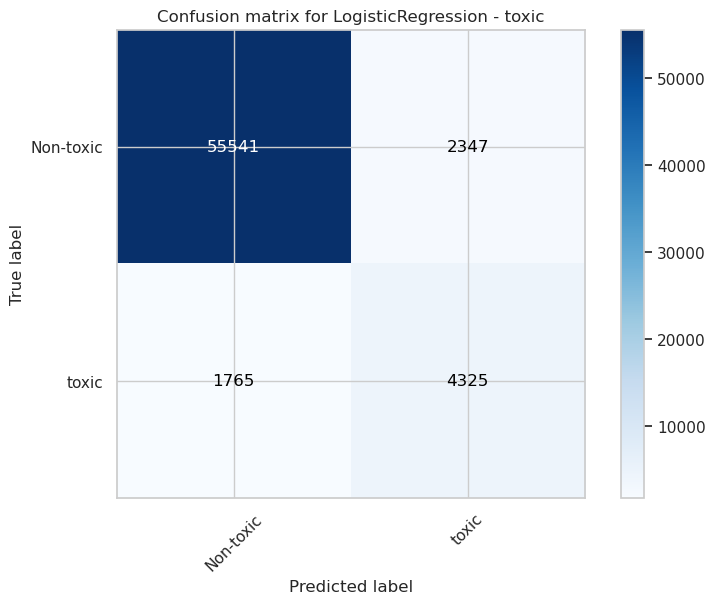

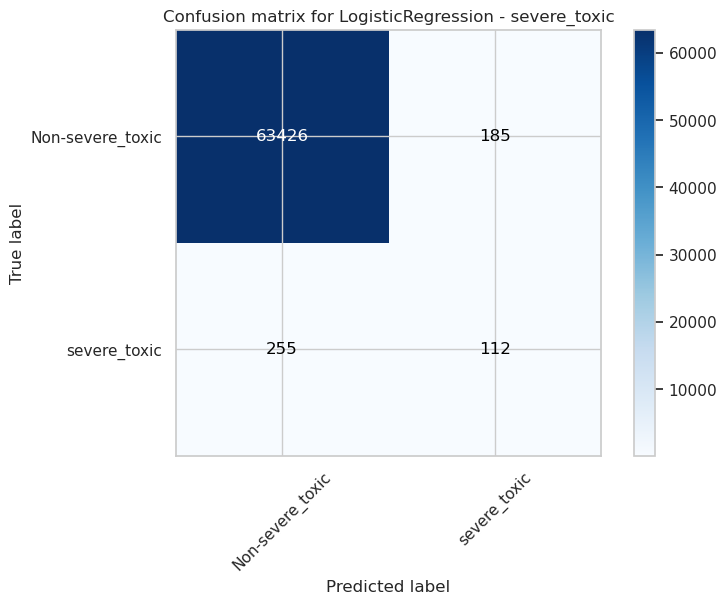

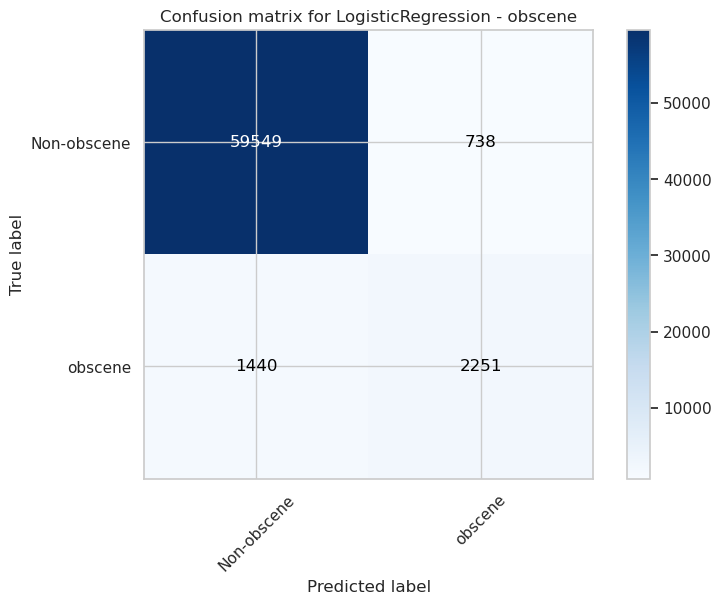

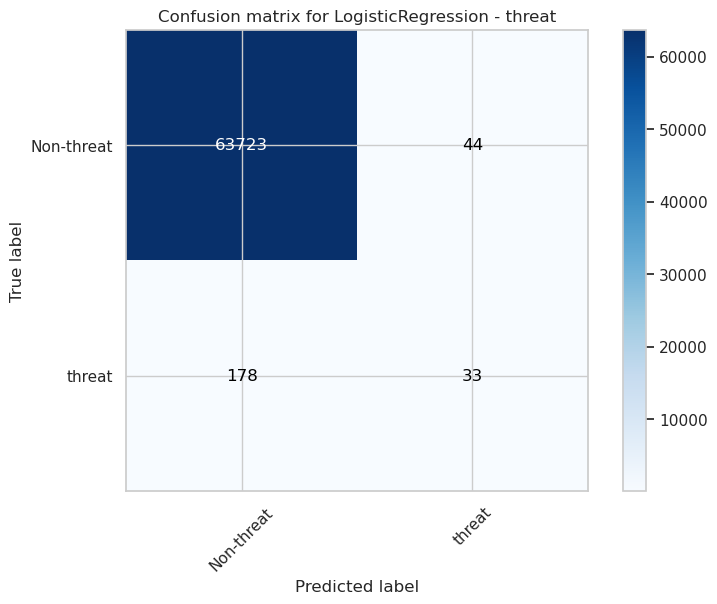

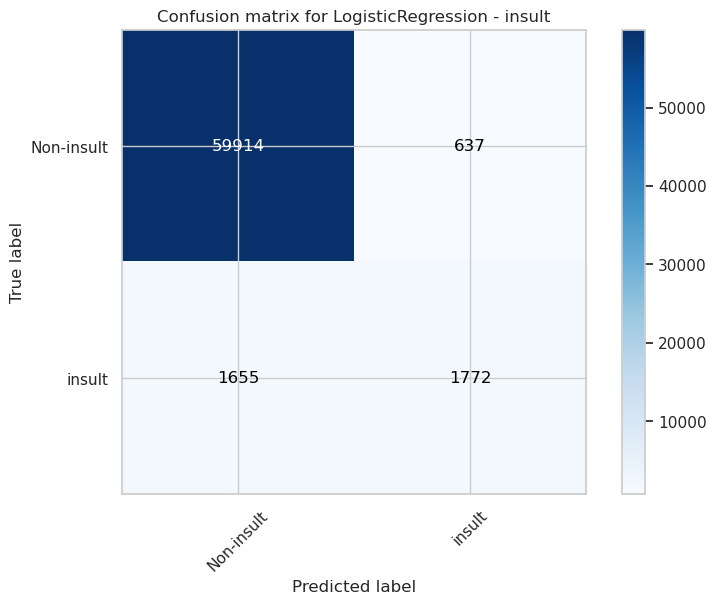

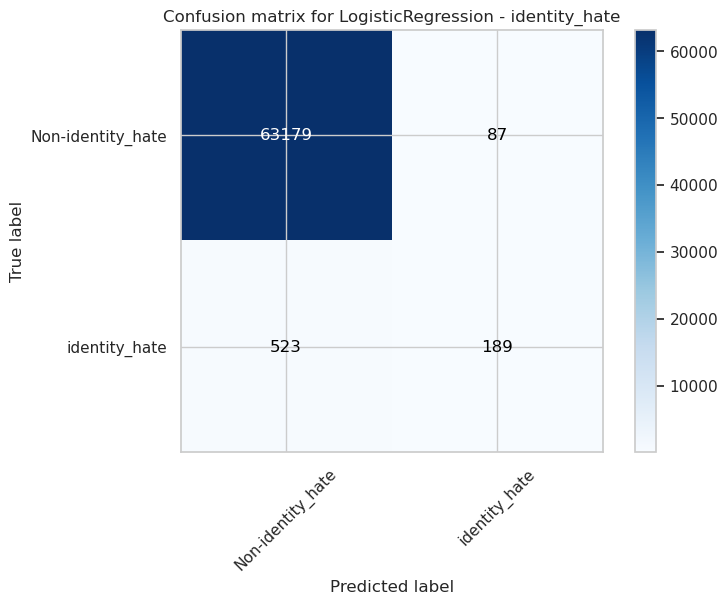

In [22]:


# Liste des modèles dans le dataframe
models = meth['Model'].unique()

# Boucle à travers chaque modèle
for model in models:
    # Extraire les données pour le modèle spécifique
    data = meth[meth['Model'] == model]
    
    # Boucle à travers chaque catégorie
    for index, row in data.iterrows():
        category = row['Label']
        confusion_matrix = row['Confusion_Matrix']
        
        # Dessiner la matrice de confusion
        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f"Confusion matrix for {model} - {category}")
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["Non-" + category, category], rotation=45)
        plt.yticks(tick_marks, ["Non-" + category, category])
        
        # Ajouter les valeurs de la matrice de confusion dans chaque cellule
        thresh = confusion_matrix.max() / 2.
        for i in range(confusion_matrix.shape[0]):
            for j in range(confusion_matrix.shape[1]):
                plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if confusion_matrix[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()


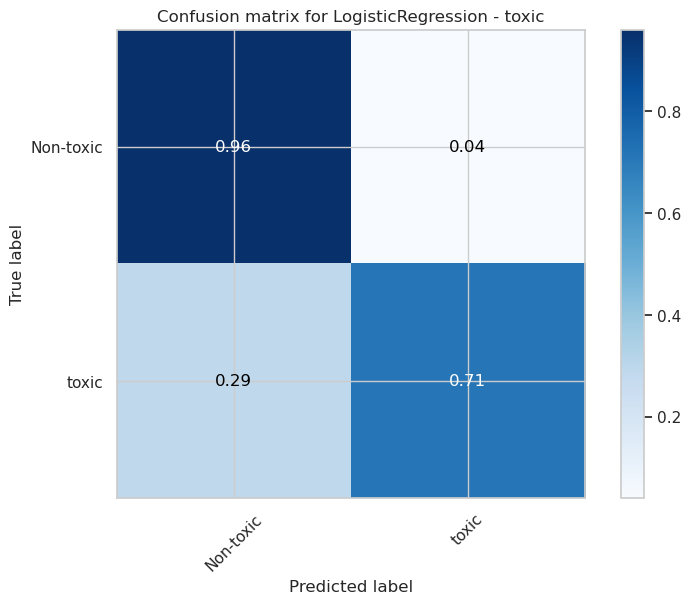

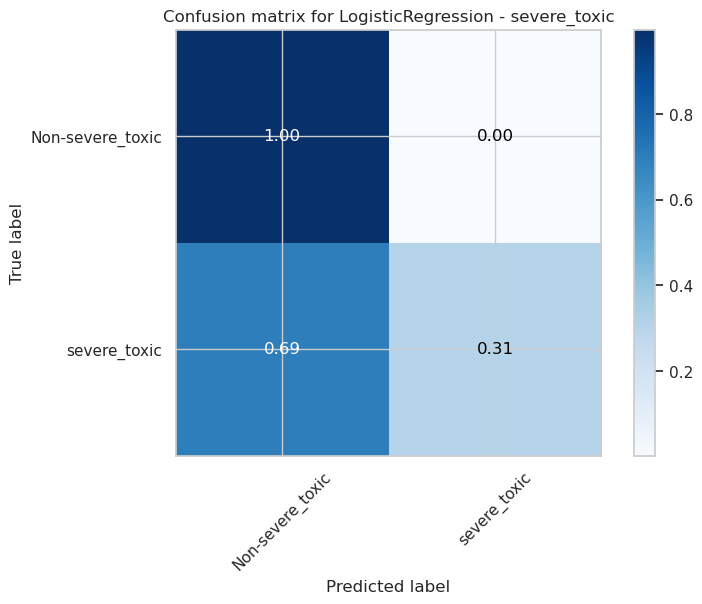

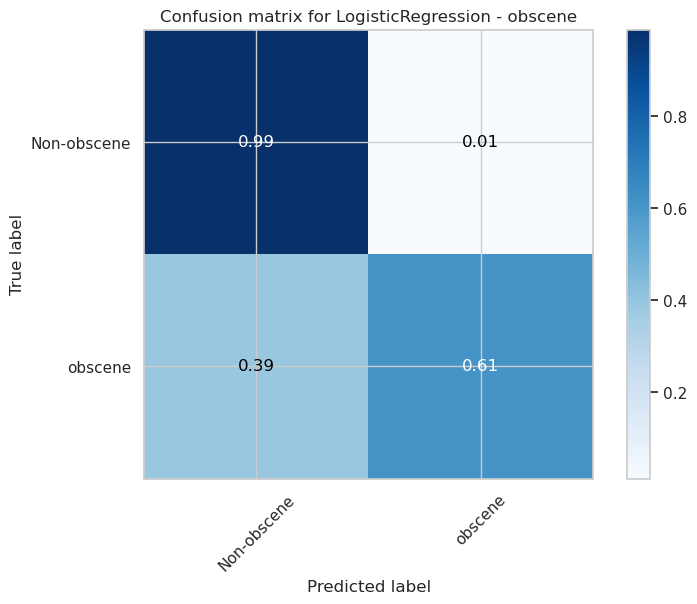

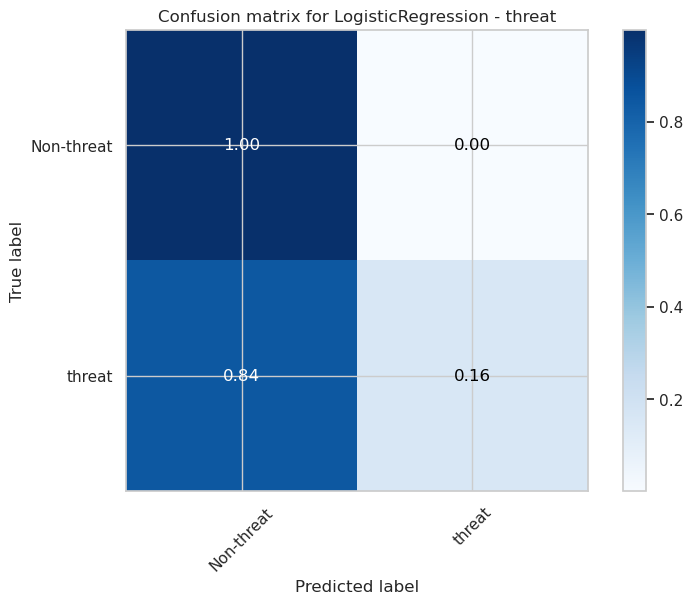

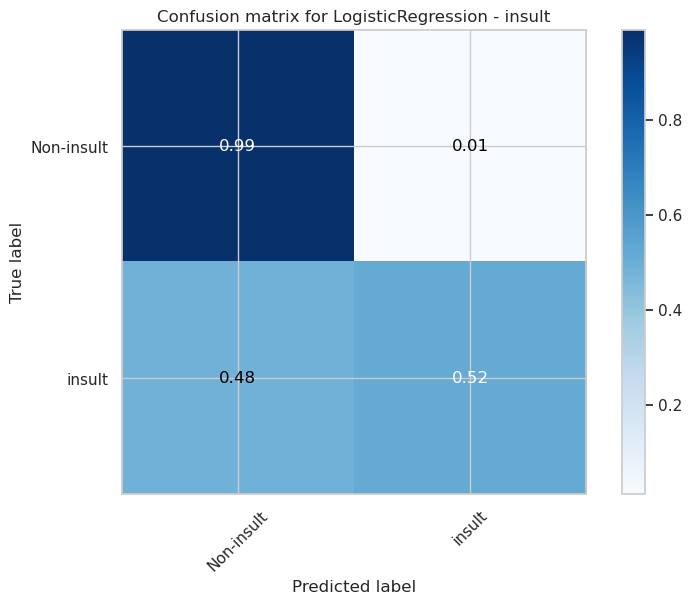

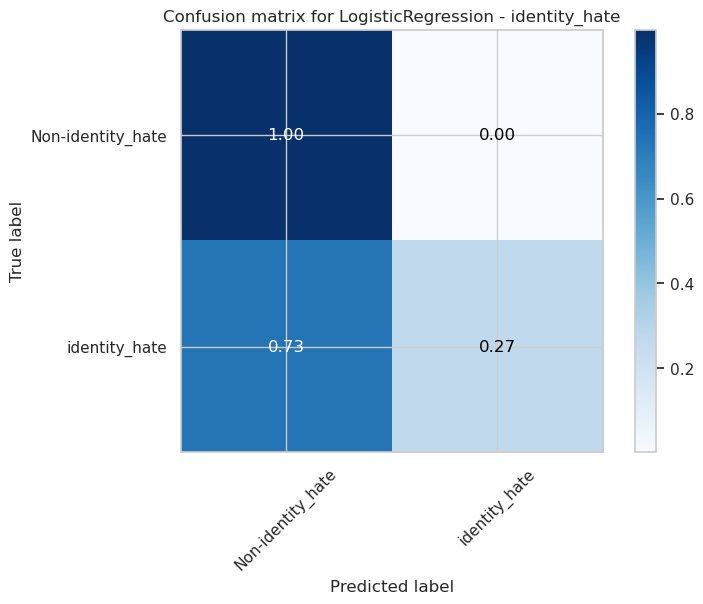

In [23]:
# Liste des modèles dans le dataframe
models = meth['Model'].unique()

# Boucle à travers chaque modèle
for model in models:
    # Extraire les données pour le modèle spécifique
    data = meth[meth['Model'] == model]
    
    # Boucle à travers chaque catégorie
    for index, row in data.iterrows():
        category = row['Label']
        confusion_matrix = row['Confusion_Matrix']
        
        # Normaliser la matrice de confusion
        confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

        # Dessiner la matrice de confusion
        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f"Confusion matrix for {model} - {category}")
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["Non-" + category, category], rotation=45)
        plt.yticks(tick_marks, ["Non-" + category, category])
        
        # Ajouter les valeurs de la matrice de confusion dans chaque cellule
        thresh = confusion_matrix_norm.max() / 2.
        for i in range(confusion_matrix_norm.shape[0]):
            for j in range(confusion_matrix_norm.shape[1]):
                plt.text(j, i, format(confusion_matrix_norm[i, j], '.2f'),
                         ha="center", va="center",
                         color="white" if confusion_matrix_norm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()


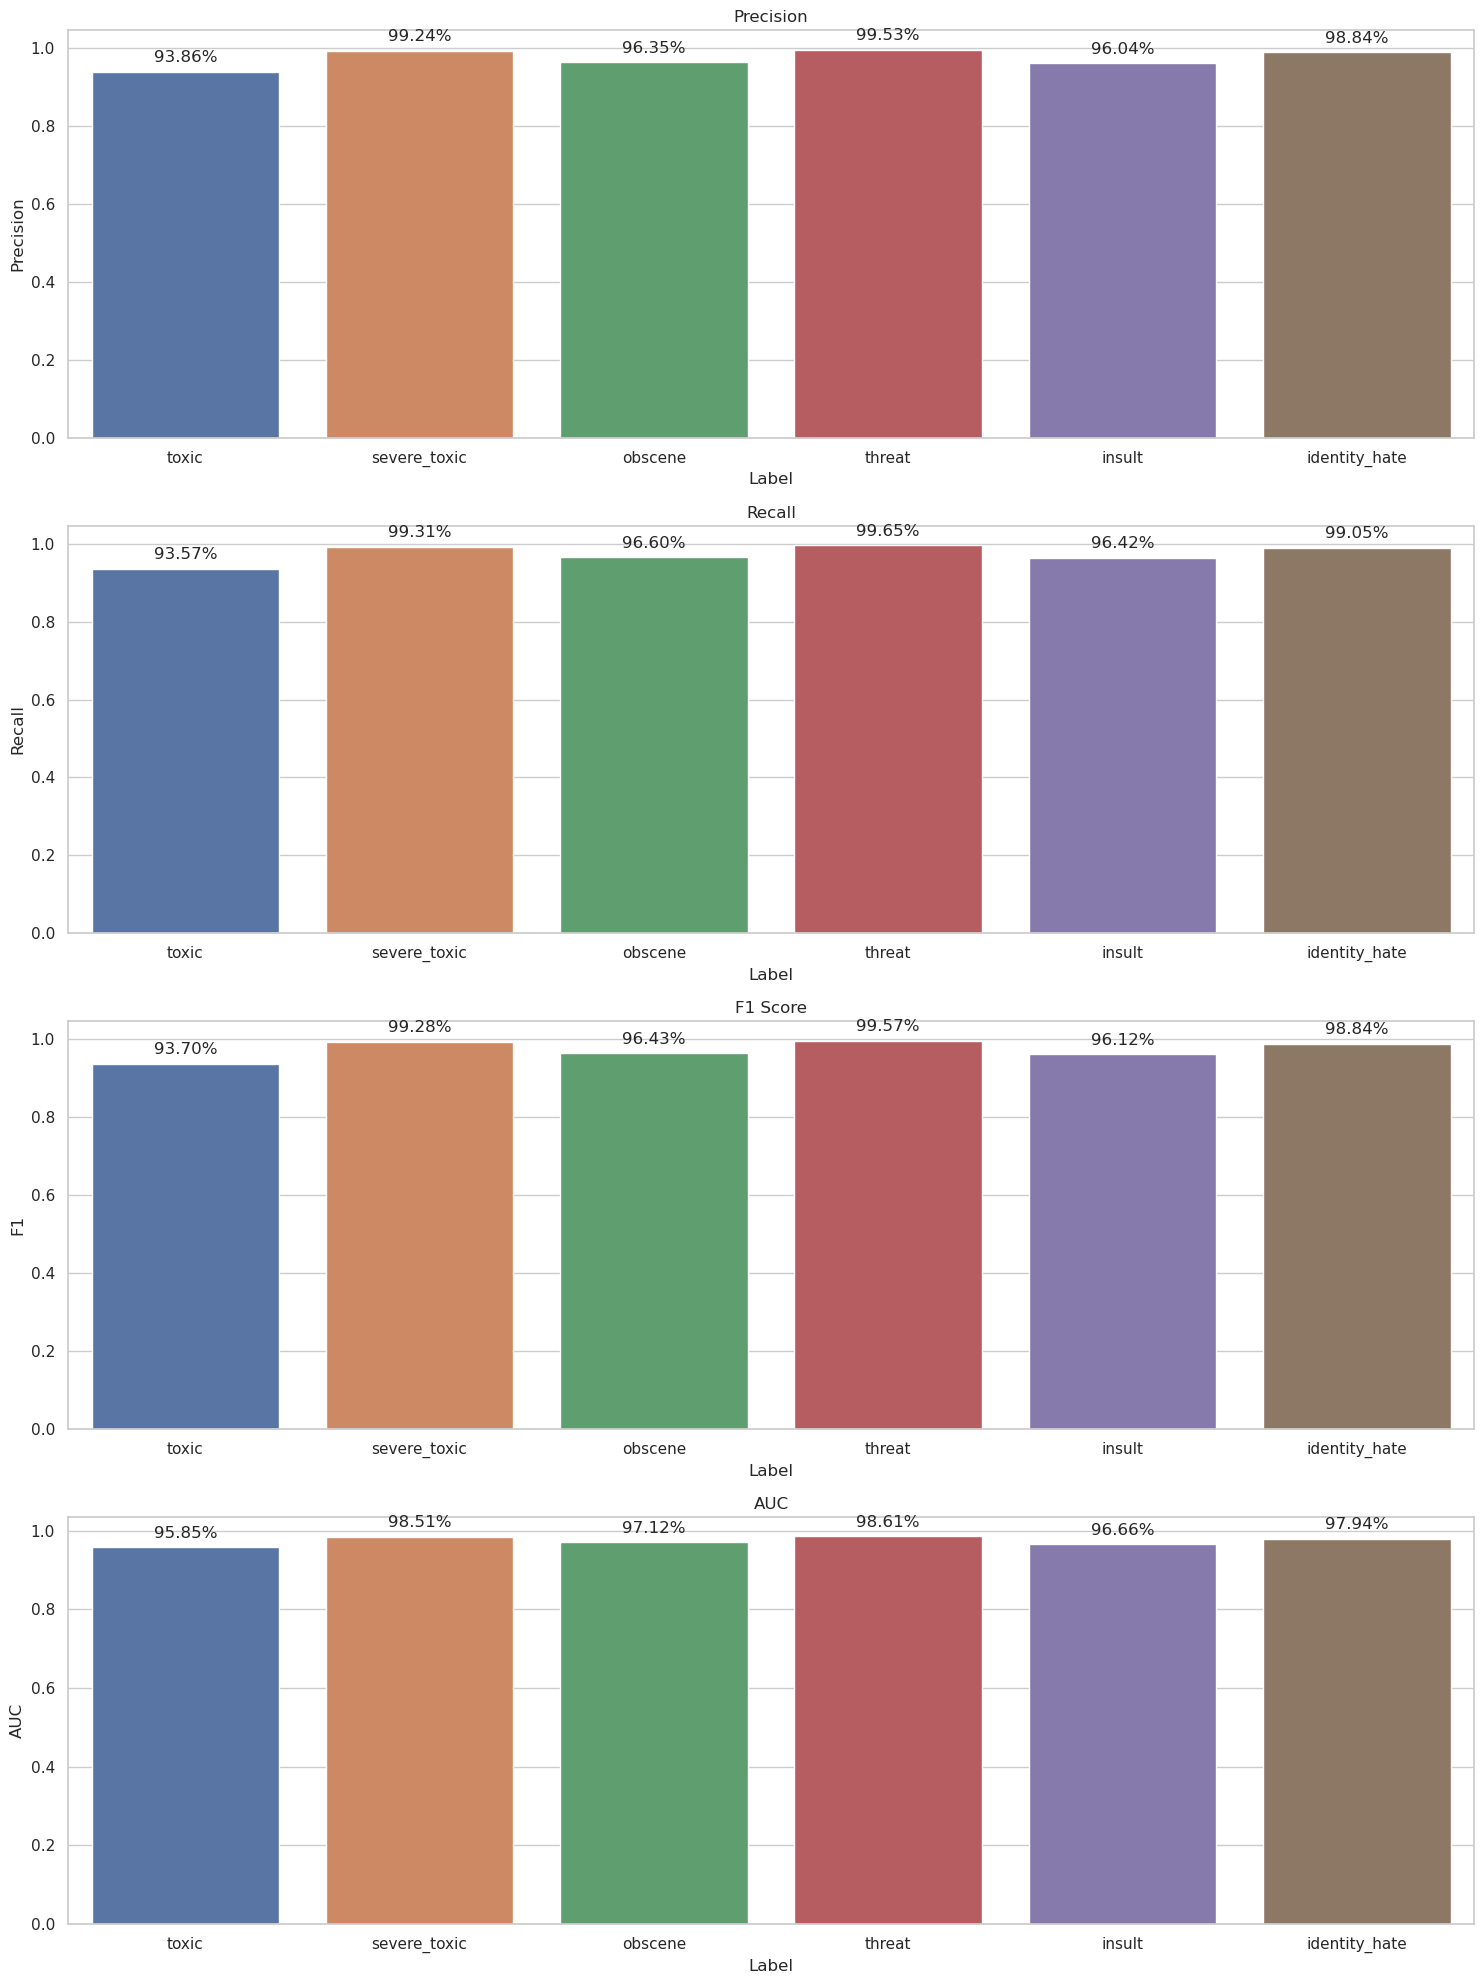

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'une figure et d'un layout
fig, ax = plt.subplots(4, 1, figsize=(15,20))

# Pour chaque métrique
bar1 = sns.barplot(x='Label', y='Precision', data=meth, ax=ax[0])
bar2 = sns.barplot(x='Label', y='Recall', data=meth, ax=ax[1])
bar3 = sns.barplot(x='Label', y='F1', data=meth, ax=ax[2])
bar4 = sns.barplot(x='Label', y='AUC', data=meth, ax=ax[3])

# Ajouter les proportions sur chaque barre
for p in bar1.patches:
    bar1.annotate(format(p.get_height() * 100, '.2f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
for p in bar2.patches:
    bar2.annotate(format(p.get_height() * 100, '.2f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
for p in bar3.patches:
    bar3.annotate(format(p.get_height() * 100, '.2f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
for p in bar4.patches:
    bar4.annotate(format(p.get_height() * 100, '.2f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Mise en page finale
ax[0].set_title('Precision')
ax[1].set_title('Recall')
ax[2].set_title('F1 Score')
ax[3].set_title('AUC')
plt.tight_layout()
plt.show()


Results Interpretation

In [25]:
test_y

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [26]:
from sklearn.linear_model import LogisticRegression

label = 'toxic'
lr = LogisticRegression()
lr.fit(X_train, train[label])
Toxic_LR = lr.predict(X_test)

# Concatenating test set with its predictions
test_combined = pd.concat([test,test_y, pd.DataFrame(Toxic_LR, columns=['predict_' + label])], axis=1)

# Checking the comments that were actually toxic but predicted as non-toxic
commentCheck = test_combined[(test_combined.toxic == 1) & (test_combined['predict_' + label] == 0)].comment_text
commentCheck.shape


(1765,)

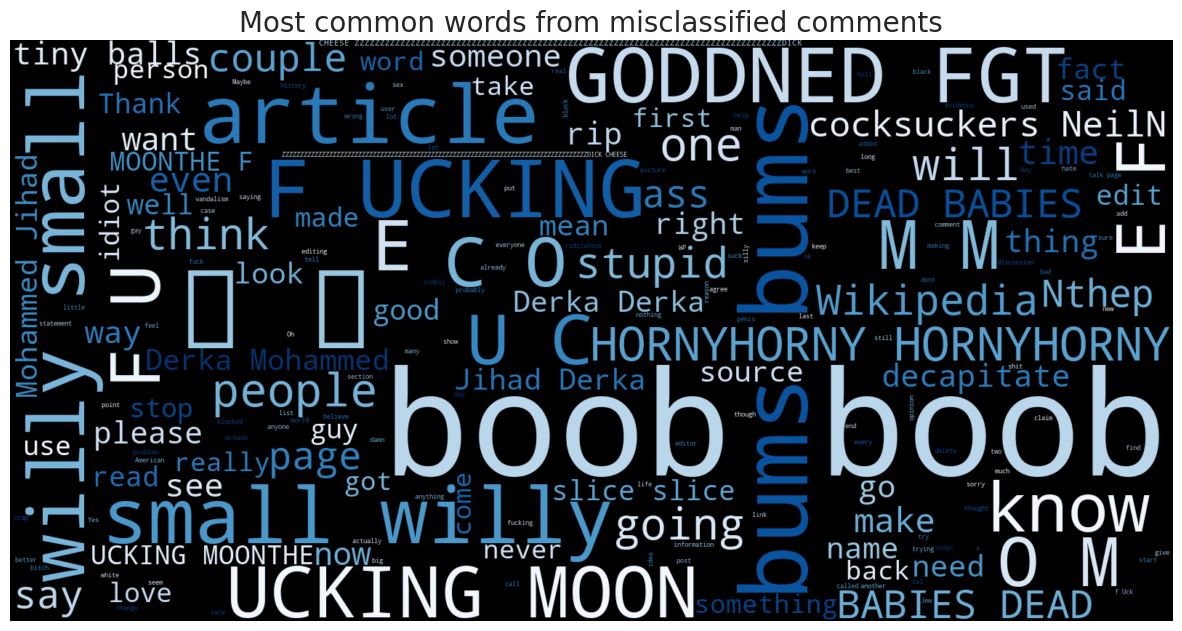

In [27]:
# extract wrongly classified comments
commentCheck = test_combined[(test_combined.toxic == 1) & (test_combined['predict_' + label] == 0)].comment_text

# Concatenate all the comments
neg_Check = pd.Series(commentCheck).str.cat(sep=' ')

# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_Check)

# Display the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.axis("off")
plt.title("Most common words from misclassified comments", size=20)
plt.show()


In [28]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

wrongWords = preprocessing(neg_Check)
stop_words = stopwords.words('english')
wrongWords = [w for w in wrongWords if w not in stop_words]
cntr = Counter(wrongWords)
cntr.most_common(20)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('boob', 1011),
 ('bum', 355),
 ('article', 258),
 ('ucking', 254),
 ('small', 248),
 ('like', 245),
 ('willy', 240),
 ('goddned', 226),
 ('fgt', 226),
 ('moon', 200),
 ('know', 178),
 ('hornyhorny', 174),
 ('people', 169),
 ('one', 169),
 ('page', 159),
 ('going', 152),
 ('wikipedia', 152),
 ('stupid', 151),
 ('think', 149),
 ('would', 140)]

In [30]:


neg_text_train = train['comment_text'].str.cat(sep=' ')
cntr_train = Counter(preprocessing(neg_text_train))
cntr_train.get('ucking')



5

In [31]:


neg_text_train = train['comment_text'].str.cat(sep=' ')
cntr_train = Counter(preprocessing(neg_text_train))
cntr_train.get('boob')



404

In [32]:
# Fit the model
label = 'toxic'
clf = LogisticRegression()
clf.fit(X_train, train[label])

# Get the feature importance (coefficients)
feature_importance = clf.coef_[0]

# Get the top 5 feature names
top_5_features = np.argsort(feature_importance)[-5:]

# For TfidfVectorizer
feature_names = vector.get_feature_names_out()

print("Top 5 features:")
for i in top_5_features:
    print(feature_names[i], feature_importance[i])


Top 5 features:
stupid 11.201159533080693
shit 11.58585425594464
idiot 11.865546974262994
fucking 13.828957530505285
fuck 16.685438921761296


In [33]:
# Ajuster le modèle
label = 'toxic'
clf = LogisticRegression()
clf.fit(X_train, train[label])

# Obtenir l'importance des caractéristiques (coefficients)
feature_importance = clf.coef_[0]

# Obtenir les 5 principales caractéristiques
top_5_features = np.argsort(feature_importance)[-5:][::-1]

# Pour TfidfVectorizer
feature_names = vector.get_feature_names_out()

print("Les 5 principales caractéristiques:")
for i in top_5_features:
    print(feature_names[i], feature_importance[i])


Les 5 principales caractéristiques:
fuck 16.685438921761296
fucking 13.828957530505285
idiot 11.865546974262994
shit 11.58585425594464
stupid 11.201159533080693


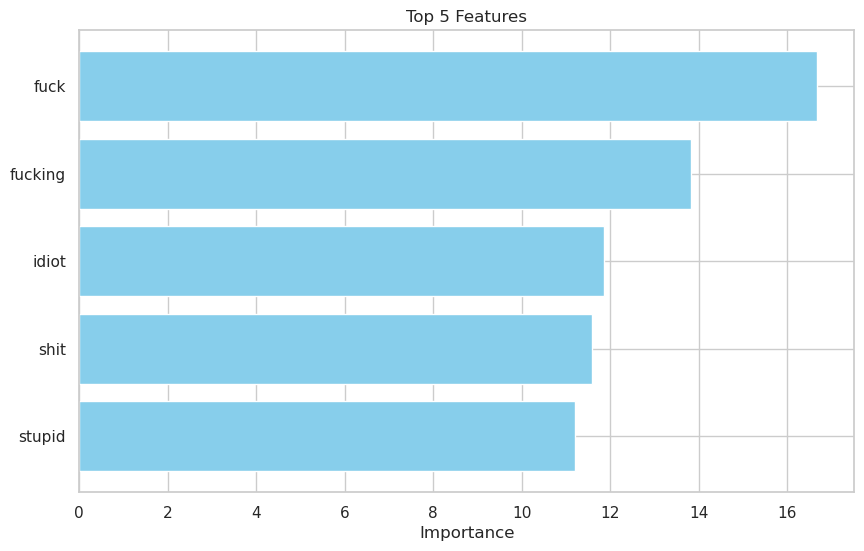

In [34]:
import matplotlib.pyplot as plt

# Fit the model
label = 'toxic'
clf = LogisticRegression()
clf.fit(X_train, train[label])

# Get the feature importance (coefficients)
feature_importance = clf.coef_[0]

# Get the top 5 feature names
top_5_features_indices = np.argsort(feature_importance)[-5:][::-1]
top_5_features = [feature_names[i] for i in top_5_features_indices]
top_5_importances = [feature_importance[i] for i in top_5_features_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_5_features, top_5_importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Top 5 Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
## Modèle unique

In [51]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.multioutput import ClassifierChain

def score_unique(classifier, X_train, y_train, X_test, y_test):
    train_results = []
    test_results = []

    # We wrap the classifier with ClassifierChain
    chain = ClassifierChain(classifier)

    # fit the chain of classifiers on the training data
    chain.fit(X_train, y_train)

    # predict for train set
    predicted_train = chain.predict(X_train)
    predicted_train_prob = chain.predict_proba(X_train)

    # predict for test set
    predicted_test = chain.predict(X_test)
    predicted_test_prob = chain.predict_proba(X_test)


    return predicted_test, predicted_train

# instantiate a Logistic Regression classifier
clf = LogisticRegression()




In [67]:
# call the modified score function
predicted_test, predicted_train = score_unique(clf, X_train, train[categories].values, X_test, test_y[categories].values)

In [53]:
predicted_test

array([[1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

In [55]:
test_y[categories]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...
153159,-1,-1,-1,-1,-1,-1
153160,-1,-1,-1,-1,-1,-1
153161,-1,-1,-1,-1,-1,-1
153162,-1,-1,-1,-1,-1,-1


In [63]:
# Define column names by adding the suffix '_predicted' to the original column names
column_names = [col + '_predicted' for col in test_y[categories].columns]

# Convert the numpy array to a DataFrame
predicted_test_df = pd.DataFrame(predicted_test, columns=column_names).astype(int)


predicted_test_df

,toxic_predicted,severe_toxic_predicted,obscene_predicted,threat_predicted,insult_predicted,identity_hate_predicted
0,1,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,1,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [65]:
# Define column names by adding the suffix '_predicted' to the original column names
column_names = [col + '_predicted' for col in train[categories].columns]

# Convert the numpy array to a DataFrame
predicted_train_df = pd.DataFrame(predicted_train, columns=column_names).astype(int)


predicted_train_df

,toxic_predicted,severe_toxic_predicted,obscene_predicted,threat_predicted,insult_predicted,identity_hate_predicted
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def score_unique(y_train, predicted_train, y_test, predicted_test):
    test_results = []
    


    for i, label in enumerate(y_test.columns):
        mask = (y_test[label] != -1).to_numpy()

        # calculate metrics for test set
        precision_test = precision_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        recall_test = recall_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        f1_test = f1_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        auc_test = roc_auc_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"])
        test_conf_matrix = confusion_matrix(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"])

        test_results.append([label, precision_test, recall_test, f1_test, auc_test, test_conf_matrix])

    test_results_df = pd.DataFrame(test_results, columns=['Label', 'Precision', 'Recall', 'F1', 'AUC', 'Confusion_Matrix'])
    
    return test_results_df


In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def score_unique(y_train, predicted_train_df, y_test, predicted_test_df):
    train_results = []
    test_results = []
    

    for i, label in enumerate(y_test.columns):
        # calculate metrics for train set
        precision_train = precision_score(y_train[label], predicted_train_df[f"{label}_predicted"], average="weighted")
        recall_train = recall_score(y_train[label], predicted_train_df[f"{label}_predicted"], average="weighted")
        f1_train = f1_score(y_train[label], predicted_train_df[f"{label}_predicted"], average="weighted")
        auc_train = roc_auc_score(y_train[label], predicted_train_df[f"{label}_predicted"])
        train_conf_matrix = confusion_matrix(y_train[label], predicted_train_df[f"{label}_predicted"])
        
        train_results.append([label, precision_train, recall_train, f1_train, auc_train, train_conf_matrix])
        
        mask = (y_test[label] != -1).to_numpy()

        # calculate metrics for test set
        precision_test = precision_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        recall_test = recall_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        f1_test = f1_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"], average="weighted")
        auc_test = roc_auc_score(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"])
        test_conf_matrix = confusion_matrix(y_test[mask][label], predicted_test_df[mask][f"{label}_predicted"])

        test_results.append([label, precision_test, recall_test, f1_test, auc_test, test_conf_matrix])

    train_results_df = pd.DataFrame(train_results, columns=['Label', 'Precision', 'Recall', 'F1', 'AUC', 'Confusion_Matrix'])
    test_results_df = pd.DataFrame(test_results, columns=['Label', 'Precision', 'Recall', 'F1', 'AUC', 'Confusion_Matrix'])
    
    return train_results_df, test_results_df


In [73]:
train_results_df, test_results_df = score_unique(train[categories], predicted_train_df, test_y[categories], predicted_test_df)

In [74]:
train_results_df.mean()

Precision    0.981814
Recall       0.983019
F1           0.981450
AUC          0.726514
dtype: float64

In [75]:
test_results_df.mean()

Precision    0.972642
Recall       0.972894
F1           0.972522
AUC          0.720002
dtype: float64

In [76]:
test_y

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [82]:
test_y

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def score(classifier, X_train, y_train, X_test, y_test):
    name = classifier.__class__.__name__.split('.')[-1]
    test_results = []
    train_results = []

    # create a new dataframe to store the predicted values
    predicted_test_df = pd.DataFrame()

    for label in categories:
        classifier.fit(X_train, y_train[label])

        # predict for test set
        predicted_test = classifier.predict(X_test)
        predicted_test_prob = classifier.predict_proba(X_test)[:, 1]

        # add the predicted values to the predicted_test_df
        predicted_test_df[label+"_predicted"] = predicted_test

        precision_test = precision_score(y_test[label], predicted_test, average="weighted")
        recall_test = recall_score(y_test[label], predicted_test, average="weighted")
        f1_test = f1_score(y_test[label], predicted_test, average="weighted")
        auc_test = roc_auc_score(y_test[label], predicted_test_prob)
        test_conf_matrix = confusion_matrix(y_test[label], predicted_test)

        test_results.append([name, label, precision_test, recall_test, f1_test, auc_test, test_conf_matrix])

        # predict for train set
        predicted_train = classifier.predict(X_train)
        predicted_train_prob = classifier.predict_proba(X_train)[:, 1]

        precision_train = precision_score(y_train[label], predicted_train, average="weighted")
        recall_train = recall_score(y_train[label], predicted_train, average="weighted")
        f1_train = f1_score(y_train[label], predicted_train, average="weighted")
        auc_train = roc_auc_score(y_train[label], predicted_train_prob)
        train_conf_matrix = confusion_matrix(y_train[label], predicted_train)

        train_results.append([name, label, precision_train, recall_train, f1_train, auc_train, train_conf_matrix])

    return test_results, train_results, predicted_test_df




In [81]:
clf = LogisticRegression()

test_results, train_results, predicted_test_df = score(clf, X_train, train, X_test, test_y)

# concatenate the predicted values to the test set
test_y_predicted = pd.concat([test_y, predicted_test_df], axis=1)


ValueError: multi_class must be in ('ovo', 'ovr')